# 1.线性回归

In [1]:
from sklearn.datasets import load_boston
boston=load_boston()
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(boston.data,boston.target,test_size=0.2,random_state=1)
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(x_train,y_train)
y_pred=regr.predict(x_test)
from sklearn.metrics import mean_absolute_error
print("mae",mean_absolute_error(y_test,y_pred))

mae 3.74913846814


D:\develop\Anaconda\envs\python35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 2,.逻辑回归（其实是分类）

##### 关于对数几率函数（logistic function）或叫做对率函数，见机器学习（周志华）P56-58。
与广义线性模型、对数线性回归是不一样的。

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
if __name__ == '__main__':
    X, y = make_classification(5000, flip_y=0.5)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    clf = LogisticRegression()
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.70      0.64      0.67       736
          1       0.68      0.73      0.70       764

avg / total       0.69      0.69      0.69      1500



# 2.K均值

先生成两组数据：

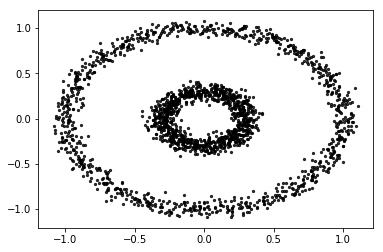

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
N_samples=2000
dataset1=np.array(datasets.make_circles(n_samples=N_samples,noise=0.05,factor=0.3)[0])
dataset2=np.array(datasets.make_blobs(n_samples=N_samples,centers=4,cluster_std=0.4,random_state=0)[0])
plt.scatter(dataset1[:,0],dataset1[:,1],c='k',alpha=0.8,s=5.0)
plt.show()

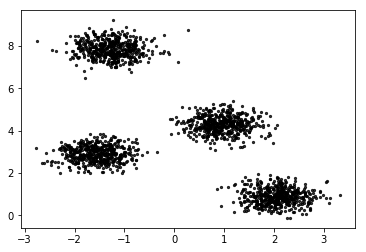

In [3]:
plt.scatter(dataset2[:,0],dataset2[:,1],c='k',alpha=0.8,s=5.0)
plt.show()

对dataset2进行k-means：

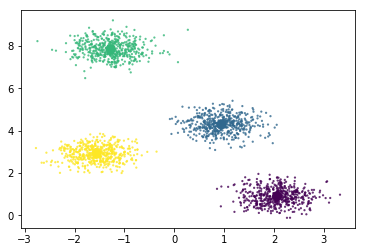

In [4]:
from sklearn.cluster import KMeans
K_dataset2=4
km_2=KMeans(n_clusters=K_dataset2)
labels2=km_2.fit(dataset2).labels_
plt.scatter(dataset2[:,0],dataset2[:,1],c=labels2,alpha=0.8,s=5.0,linewidths=0)
plt.scatter(km_2.cluster_centers_[:,0],km_2.cluster_centers_[:,1],s=100,c=np.unique(labels2),linewidths=0.2)
plt.show()

对dataset1进行k-means：(由于k均值算法期望一个球形的数据聚类，因此对于dataset1先进行核PCA)

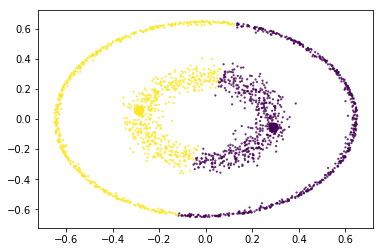

In [5]:
from sklearn.decomposition import KernelPCA
pca_2c=KernelPCA(n_components=2,kernel='rbf')
dataset1=pca_2c.fit_transform(dataset1)
K_dataset1=2
km_1=KMeans(n_clusters=K_dataset1)
labels1=km_1.fit(dataset1).labels_
plt.scatter(dataset1[:,0],dataset1[:,1],c=labels1,alpha=0.8,s=5.0,linewidths=0)
plt.scatter(km_1.cluster_centers_[:,0],km_1.cluster_centers_[:,1],s=100,c=np.unique(labels1),linewidths=0.2)
plt.show()

K-means可以指定初始值，详见http://blog.csdn.net/lsldd/article/details/41624305

“上面的输出中将0,1用户聚类到一起，效果并不理想。然而，如果我们可以确定用户0与用户5是有很大区别的，就可以指定用户0和用户5作为K-Means聚类算法的初始值。可以看到和我们的预期完全一致，这样效果就非常好了。”

# 3.基于密度的聚类技术DBSCAN

不仅对非球形聚类表现得非常好，对球形数据能很好胜任。
输入仅仅是一个邻域半径参数（eps参数，即被考虑为邻域的两个点之间的最大距离），对每个点而言，输出是聚类的成员标号。

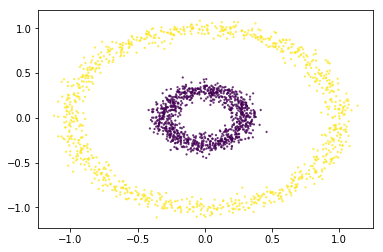

In [8]:
from sklearn.cluster import DBSCAN
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
N_samples=2000
dataset1=np.array(datasets.make_circles(n_samples=N_samples,noise=0.05,factor=0.3)[0])
dbs1=DBSCAN(eps=0.25)
labels1=dbs1.fit(dataset1).labels_
plt.scatter(dataset1[:,0],dataset1[:,1],c=labels1,alpha=0.8,s=5.0,linewidths=0)
plt.show()

In [9]:
np.unique(labels1)

array([0, 1], dtype=int64)

标记为-1的样本点表示被DBSCAN算法分类为噪声

# 4.朴素贝叶斯

In [1]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
iris=datasets.load_iris()
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2,random_state=0)
clf=GaussianNB()
clf.fit(X_train,y_train)
from sklearn.metrics import classification_report
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.00      0.96        13
          2       1.00      0.83      0.91         6

avg / total       0.97      0.97      0.97        30



D:\develop\Anaconda\envs\python35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 5.决策树

In [2]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
iris=datasets.load_iris()
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2,random_state=0)
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


# 6.集成学习

根据所用方法，通过下列方式组合预测：
（1）平均算法：通过平行的不同估计算法的结果进行平均（投票）来预测。可进一步划分为四类：粘合（pasting）、分袋（bagging）、子空间（subspacing）、分片（patches）
（2）Boosting算法：通过一系列聚合的估计模型的加权平均进行预测。

##### 关于bagging与boost

一句话的解释，来自周志华老师的机器学习教科书（ 机器学习-周志华）：Boosting主要关注降低偏差，因此Boosting能基于泛化性能相当弱的学习器构建出很强的集成；Bagging主要关注降低方差，因此它在不剪枝的决策树、神经网络等学习器上效用更为明显。
  随机森林(random forest)和GBDT都是属于集成学习（ensemble learning)的范畴。集成学习下有两个重要的策略Bagging和Boosting。
  Bagging算法是这样做的：每个分类器都随机从原样本中做有放回的采样，然后分别在这些采样后的样本上训练分类器，然后再把这些分类器组合起来。简单的多数投票一般就可以。其代表算法是随机森林。Boosting的意思是这样，他通过迭代地训练一系列的分类器，每个分类器采用的样本分布都和上一轮的学习结果有关。其代表算法是AdaBoost, GBDT。
  其实就机器学习算法来说，其泛化误差可以分解为两部分，偏差（bias)和方差(variance)。这个可由下图的式子导出（这里用到了概率论公式D(X)=E(X^2)-[E(X)]^2）。偏差指的是算法的期望预测与真实预测之间的偏差程度，反应了模型本身的拟合能力；方差度量了同等大小的训练集的变动导致学习性能的变化，刻画了数据扰动所导致的影响。这个有点儿绕，不过你一定知道过拟合。
  如下图所示，当模型越复杂时，拟合的程度就越高，模型的训练偏差就越小。但此时如果换一组数据可能模型的变化就会很大，即模型的方差很大。所以模型过于复杂的时候会导致过拟合。
  当模型越简单时，即使我们再换一组数据，最后得出的学习器和之前的学习器的差别就不那么大，模型的方差很小。还是因为模型简单，所以偏差会很大。

模型复杂度与偏差方差的关系图


  也就是说，当我们训练一个模型时，偏差和方差都得照顾到，漏掉一个都不行。
  对于Bagging算法来说，由于我们会并行地训练很多不同的分类器的目的就是降低这个方差(variance) ,因为采用了相互独立的基分类器多了以后，h的值自然就会靠近.所以对于每个基分类器来说，目标就是如何降低这个偏差（bias),所以我们会采用深度很深甚至不剪枝的决策树。
  对于Boosting来说，每一步我们都会在上一轮的基础上更加拟合原数据，所以可以保证偏差（bias）,所以对于每个基分类器来说，问题就在于如何选择variance更小的分类器，即更简单的分类器，所以我们选择了深度很浅的决策树。

## 6.1 基于弱组合的分袋策略（bagging）

分类BaggingClassifier，回归BaggingRegressor。需要确定哪种算法用于训练，然后设置估计模型的最大数目（因此对应采样的最大数目）

In [4]:
from sklearn.datasets import fetch_covtype
covertype_dataset = fetch_covtype(random_state=101,shuffle=True)
covertype_x=covertype_dataset.data[:15000,:]
covertype_y=covertype_dataset.target[:15000]
covertypex = ['A','B','C','D','E','F','G']
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
hypo = BaggingClassifier(KNeighborsClassifier(n_neighbors=1),max_samples=0.7,max_features=0.7,n_estimators=100)
scores=cross_val_score(hypo,covertype_x,covertype_y,cv=3,scoring='accuracy',n_jobs=-1)
print(np.mean(scores),np.std(scores))

0.794934801586 0.00481038416493


上例是用KNN分类，knn对于小数据集非常好，但是当处理大数据集时，一定不要使用。

## 6.2 随机子空间和随机分片

### 6.2.1随机森林

在Bagging基础上，进一步在决策树的训练过程中引入了随机属性来选择。训练效率常优于bagging。

In [5]:
from sklearn.datasets import fetch_covtype
covertype_dataset = fetch_covtype(random_state=101,shuffle=True)
covertype_x=covertype_dataset.data[:15000,:]
covertype_y=covertype_dataset.target[:15000]
covertypex = ['A','B','C','D','E','F','G']
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
hypo = RandomForestClassifier(n_estimators=100,random_state=101)
scores=cross_val_score(hypo,covertype_x,covertype_y,cv=3,scoring='accuracy',n_jobs=-1)
print(np.mean(scores),np.std(scores))

0.808666738207 0.00852055187043


### 6.2.2 ExtraTrees

## 6.3 BOOST

### 6.3.1 Adaboost

### 6.3.2 GBDT 

GBDT的核心在于累加所有树的结果作为最终结果，就像前面对年龄的累加（-3是加负3），而分类树的结果显然是没办法累加的，所以GBDT中的树都是回归树，不是分类树，这点对理解GBDT相当重要（尽管GBDT调整后也可用于分类但不代表GBDT的树是分类树）。

GBDT是一个应用很广泛的算法，可以用来做分类、回归。在很多的数据上都有不错的效果。GBDT这个算法还有一些其他的名字，比如说MART(Multiple Additive Regression Tree)，GBRT(Gradient Boost Regression Tree)，Tree Net,GTB等，其实它们都是一个东西（参考自wikipedia – Gradient Boosting)，发明者是Friedman。
参考http://blog.csdn.net/taoqick/article/details/72822727

http://blog.csdn.net/Dream_angel_Z/article/details/48085889

http://www.cnblogs.com/LeftNotEasy/archive/2011/03/07/1976562.html

GBDT主要由三个概念组成：Regression Decistion Tree（即DT)，Boosting Decision Tree，Gradient Boosting（即GB)，Shrinkage (算法的一个重要演进分枝，目前大部分源码都按该版本实现）。

##### 另外，关于XGboost：

最近引起关注的一个Gradient Boosting算法：xgboost，在计算速度和准确率上，较GBDT有明显的提升。xgboost 的全称是eXtreme Gradient Boosting，它是Gradient Boosting Machine的一个c++实现，作者为正在华盛顿大学研究机器学习的大牛陈天奇 。xgboost最大的特点在于，它能够自动利用CPU的多线程进行并行，同时在算法上加以改进提高了精度。它的处女秀是Kaggle的 希格斯子信号识别竞赛，因为出众的效率与较高的预测准确度在比赛论坛中引起了参赛选手的广泛关注。值得我们在GBDT的基础上对其进一步探索学习。

GTB回归：
其中n_estimators表示弱分类器的个数，learning_rate表示学习率，max_depth表示最大的深度等。GTB的参数比较多，在实际应用中需要自己去调整合适的参数。

In [6]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.91300000000000003

###### scikit-learn梯度提升树(GBDT)调参小结

见http://www.alliedjeep.com/147311.htm

# 7.PCA

用于降维，思路是进行正交分解，使输出的正交基的能量超过95%，两个相关术语：特征向量（基向量）和特征值（特征向量对应的标准偏差）

见数据分析5

# 8.LDA

有监督分类器，常用于降维。不能用于回归分析。
见数据分析6

# 9.划分验证集的SVM（手写字体识别）

见数据分析9

# 10.交叉验证和数据集划分

见数据分析9

# 11.超参数调节